# NOTE:
There is no data available for the project and to creat the Multiclass Classification , I am using the Iris Dataset. EDA, Data processings generic classes have been coded but as the data is ideal, there is no use of these. 

Feature selection is also not done using any of the wrapper or statistical methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
SEED = 13
np.random.seed(SEED)
plt.style.use('seaborn')

In [90]:
iris = datasets.load_iris() 
df = pd.DataFrame(iris.data, columns=['sepal length in cm', 
                                      'sepal width in cm',
                                      'petal length in cm',
                                      'petal width in cm'])
df['species'] = iris.target

In [91]:
names = iris['target_names']
df['species_names'] = df['species'].apply(lambda x: names[x])
new_df = df.drop(['species','species_names'],axis=1)

In [5]:
class EDA():
    '''
    Very basic EDA class to show the very basic nature of data. 
    dataframe is not required for the __init__() constructor to make it very generic.
    A pandas dataframe is required to be in every method.
    '''    
        
    
    def find_missing(self,df):
        '''
        Find the missing values by either looking at the np.nan() sum or by looking at minimum values which are not 
        supposed to be there such as height can not be 0 or negative
        '''
        
        print('Missing Values Count in each Column\n\n',df.isna().sum(),'\n')
        print('Check if missing value is replaced by 0\n\n',df.min(),'\n')
        print('Check unique values in each column\n\n',df.nunique(),'\n')
        
        
    def check_distribution(self,df,column_name):
        '''
        Checks the distribution of column in data given the column is categorical in nature.
        input:
            class_name: name of the column in dataframe
        out:
            display a pie chart with respective percentages of the classes 
        '''
    
        df[column_name].value_counts().plot(kind='pie',autopct='%1.2f%%', rotatelabels=True)
        
        
    def basic_plots(self,df):
        '''
        if there are less than 15 features, it plots the basic plots to get the visualization of data. 
        If data is categorical, it plots the bar else the distribution for numerical. Last plot is always violin
        '''
        
        if df.shape[1]<=15:
            f,ax = plt.subplots(df.shape[1]//3+1,3, figsize=(14,df.shape[1]+6))
            ax = ax.ravel()
            
            for i , column in enumerate(df.columns): # if purely categorical
                if df[column].dtypes == 'O': # class names a,b,c,d
                    df[column].value_counts().plot(kind='bar',ax=ax[i])
                
                else:
                    if df[column].nunique() < df.shape[0]//10: # classes 1,2,3,4
                        df[column].value_counts().plot(kind='bar',ax=ax[i])
                    else:
                        sns.distplot(df[column],ax=ax[i])
                
            violin = sns.violinplot(data=df,ax=ax[i+1])
            violin.set_xticklabels(violin.get_xticklabels(), rotation=45)
            
            f.delaxes(ax[-1])
            f.delaxes(ax[-2])
            
            
    
    def pairplots(self,df):
        '''
        plot the pair-plots of the data using seaborn
        '''
            
        if df.shape[1]<=10:
            sns.pairplot(df)
    
    
    def show_corr(self,df,plot=False):
        
        def fix_heatmap():
                b, t = plt.ylim() # discover the values for bottom and top
                b += 0.5 # Add 0.5 to the bottom
                t -= 0.5 # Subtract 0.5 from the top
                plt.ylim(b, t) # update the ylim(bottom, top) values
                plt.show()
        
        if plot:
            sns.heatmap(df.corr(),annot=True, cmap='coolwarm',facecolor='b',lw=2)
            fix_heatmap()
            
        print(f'Correlation of each column:\n\n')
        return df.corr()    
        

In [6]:
eda = EDA()

In [7]:
eda.find_missing(df)

Missing Values Count in each Column

 sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
species               0
species_names         0
dtype: int64 

Check if missing value is replaced by 0

 sepal length in cm       4.3
sepal width in cm          2
petal length in cm         1
petal width in cm        0.1
species                    0
species_names         setosa
dtype: object 

Check unique values in each column

 sepal length in cm    35
sepal width in cm     23
petal length in cm    43
petal width in cm     22
species                3
species_names          3
dtype: int64 



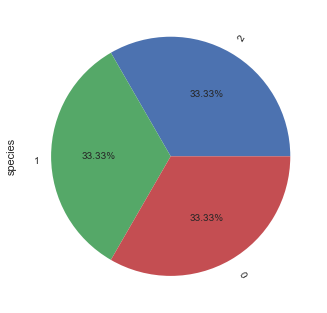

In [8]:
eda.check_distribution(df,'species')

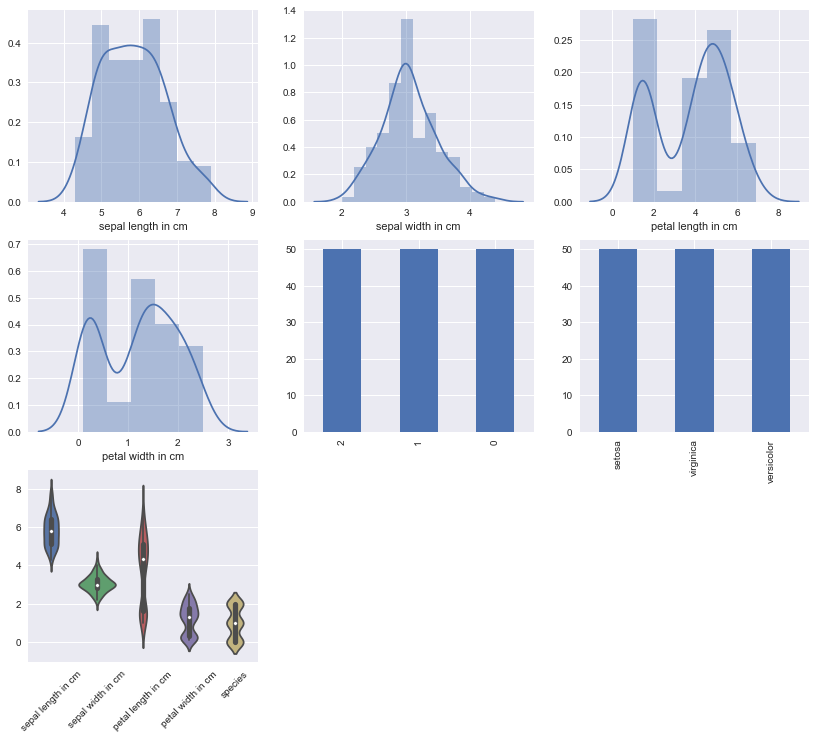

In [9]:
eda.basic_plots(df)

Distribution looks normal except petal width and petal length
### There is no need of this transformation because we just want to implement the given basic and model is producing perfect results or we could have used the ```data_transformer``` function from ```DataProcessing``` class given below.

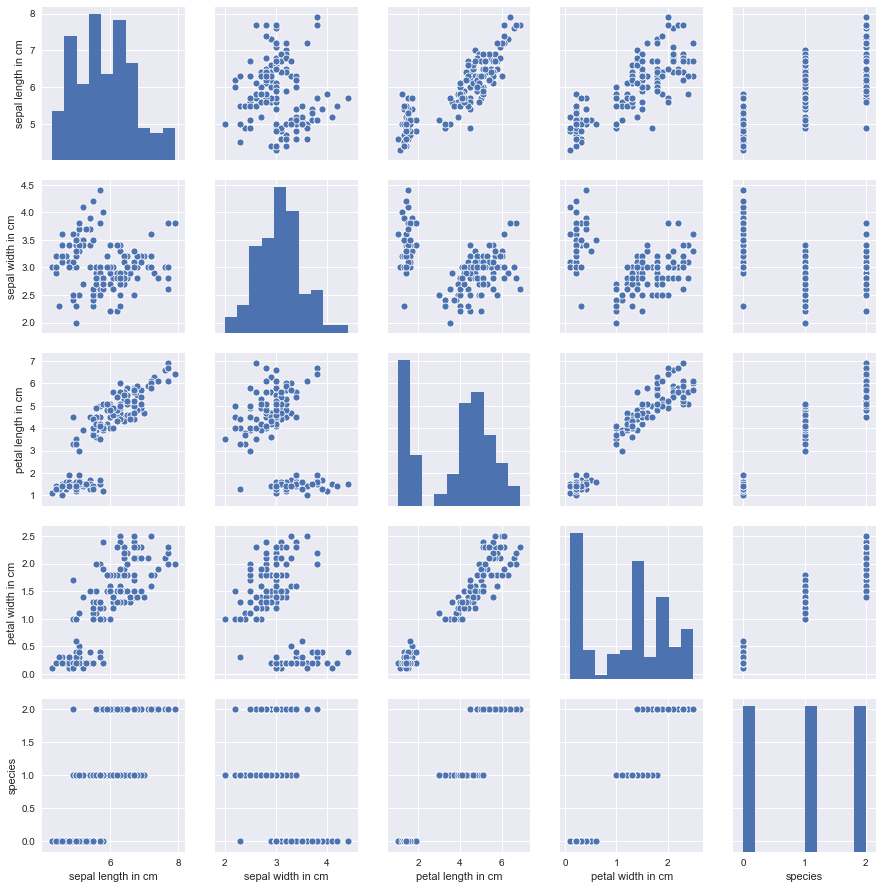

In [10]:
eda.pairplots(df)

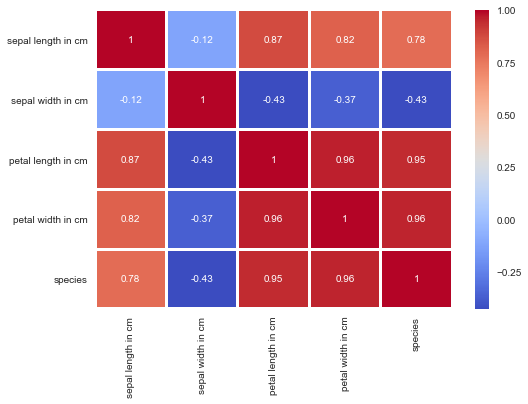

Correlation of each column:




,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
sepal length in cm,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width in cm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length in cm,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width in cm,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [11]:
eda.show_corr(df,plot=True)

In [12]:
eda.show_corr(df)

Correlation of each column:




,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
sepal length in cm,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width in cm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length in cm,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width in cm,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [13]:
class DataProcessing():
    '''
    class to perform data transformations like correlation removal, scaling and more...
    '''
    
    
    def change_distribution(self,data,t_type=0,m='min'):
        '''
        A t_type to transform data in Gaussian which is not Gaussian in nature using different techniques
        param:
            data: input data in the form of numpy array or pandas series
            t_type: transformation type 
                    options:   int {
                                    0: Square Root
                                    1: Normalization
                                    2: Sigmoid
                                    3: Cube Root
                                    4: Normalized Cube Root
                                    5: Log
                                    6: Log Max Root
                                    7: Normalized Log
                                    8: Normalized Log Max Root
                                    9: Hyperbolic Tangent
                                    10: 
                                }
            m: method for ranking procedure. Default 'min'. Check numpy docs for more

        out:
            transformed data 
        '''

        def normalize_(data):
            upper = data.max()
            lower = data.min()
            return (column - lower)/(upper-lower)

        def sigmoid_(data):
            e = np.exp(1)
            return 1/(1+e**(-data))

        def log_(data):
            if data.min()>0:
                return np.log(data)
            else:
                return np.log(data+1)


        if t_type==0:
            return np.sqrt(data)

        if t_type==1:
            return normalize_(data) # normalize

        elif t_type==2:
            return sigmoid_(data) # sigmoid

        elif t_type==3:
            return data**(1/3) # cube root

        elif t_type==4:
            return normalize_(data**(1/3)) # normalized cube root

        elif t_type==5:
            return log_(data) # log

        elif t_type==6:
            return data**(np.log(data.max())) # log-max-root 

        elif t_type==7:
            return normalize_(log_(data)) # normalized log

        elif t_type==8:
            return normalize_(data**(np.log(data.max()))) # normalized log-max-root

        elif t_type==9:
            return np.tanh(data) # hyperbolic tangent

        elif t_type==10: # ranking 
            return data.rank(method=m).apply(lambda x: (x-1)/len(data)-1)

        else:
            print('No Suitable t_type Specified. Returning Data')
            return(data) 

    
    def transform(self,df,method='standard',columns=None):
        '''
        Method to transform the data using different data transformation techniques such as 
        Standardization, MinMax, Robust and Normalization
        
        args:
            df: pandas dataframe or numpy array. Requires only numerical values
            method: method to do the scaling
                    {
                    'standard' :  default for Standardization
                    'minmax': Minmax Scaling
                    'norm': Normalized Scaling
                    'robust': Robust Scaling
                    }
            columns: list of name of columns in case of pandas frame else the whole df is used
        out:
            arr = numpy transformed array
        '''
        if columns:
            df = df[columns]
            
        if method == 'standard':
            from sklearn.preprocessing import StandardScaler
            return StandardScaler().fit_transform(df)
        
        elif method == 'minmax':
            from skimage.preprocessing import MinmaxScaler
            return MinmaxScaler().fit_transform(df)
        
        elif method =='norm':
            from sklearn.preprocessing import Normalizer
            return Normalizer().fit_transform(df)
        
        elif method == 'robust':
            from sklearn.preprocessing import RobustScaler
            return RobustScaler.fit_transform(df)
        
        else:
            print('No suitable method found. Plese check the documentation')
            
    
    def remove_corr(self,df,thresh=0.90,drop=True,inplace=False,show_correlated=False):
        '''
        Remove the highly correlated features from a given dataset given on the threshold
        params:
            df: pandas Dataframe
            thresh: threshold value to remove the correlated features
            drop: whether to drop the correlated columns or not
            inplace: Bool. drops the dataframe value in place. default false 
            show_correlated: Bool. show the names of correlated features 
        out:
            dataframe with dropped columns
        '''
        
        corr_matrix = df.corr().abs()

        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
        # Select upper triangle of correlation matrix

        to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
        # Find index of feature columns with correlation greater than thresh
        
        if show_correlated:
            print(to_drop)
        
        if drop:
            return df.drop(df[to_drop], axis=1,inplace=inplace)


In [14]:
dp = DataProcessing()

In [93]:
X = dp.remove_corr(new_df,show_correlated=True)

['petal width in cm']


In [94]:
X = dp.transform(X)

In [99]:
new_df = pd.DataFrame(X,columns=new_df.columns.tolist().remove('petal width in cm'))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.2, random_state = SEED) 

In [18]:
class Grid():
    def __init__(self,clf,param_grid):
        self.grid = GridSearchCV(clf,param_grid,cv=10,return_train_score=True,
                                 scoring=['f1_macro','accuracy'],refit='f1_macro')
        self.grid.fit(X_train,y_train)
        return None
    
    
    def show_prediction_results(self,X_test,y_test,grid=False, 
                acc=True,prec=False,rec=False,f1=True,classi_report=True,conf_matrix=False):
        
        if self.grid:
            grid = self.grid
            
        y_pred = grid.best_estimator_.predict(X_test)
        if acc:
            acc = accuracy_score(y_test,y_pred)
            print(f'Accuracy of model is {acc}\n')
        
        if rec:
            rec = recall_score(y_test,y_pred)
            print(f'Recall score of model is {rec}\n')
            
        if prec:
            prec = precision_score(y_test,y_pred)
            print(f'Precision score of model is {prec}\n')
        
        if f1:
            f1 = f1_score(y_test,y_pred, average='macro')
            print(f'F1 score of model is {f1}\n')
        
        if conf_matrix:
            conf = confusion_matrix(y_test,y_pred)
            print(f'Confusion Matrix:\n\n{conf}\n')
        
        if classi_report:
            print(f'Classification Report: \n\n{classification_report(y_test,y_pred)}')

# Q.2

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = Grid(KNeighborsClassifier(),param_grid={'n_neighbors':range(1,51)})
grid = model.grid
result = grid.cv_results_
mean_f1_macro = result['mean_test_f1_macro']
mean_test_acc = result['mean_test_accuracy']

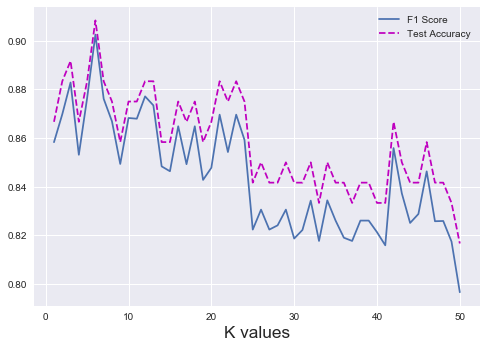

In [21]:
plt.plot(range(1,51),mean_f1_macro, label='F1 Score')
plt.plot(range(1,51),mean_test_acc, label='Test Accuracy', ls='--',color='m')
plt.xlabel('K values', size='xx-large')
plt.legend()
plt.show()

In [23]:
grid.best_params_

{'n_neighbors': 6}

it is evident that f1 and accuracy are maximum somewhere near k=6

In [24]:
model.show_prediction_results(X_test,y_test,conf_matrix=True)

Accuracy of model is 0.9

F1 score of model is 0.9038901601830664

Confusion Matrix:

[[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.73      1.00      0.84         8
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



# Q.3

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_param = {
    'C':[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2],
    'l1_ratio':[ 0,0.15,0.5,0.7,1]}

clf = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='auto',max_iter=200)

In [27]:
model = Grid(clf,log_param)
grid = model.grid
result = grid.cv_results_
mean_f1_macro = result['mean_test_f1_macro']
mean_test_acc = result['mean_test_accuracy']
grid.best_params_

{'C': 0.03, 'l1_ratio': 0.5}

In [28]:
model.show_prediction_results(X_test,y_test,conf_matrix=True)

Accuracy of model is 0.8

F1 score of model is 0.8090909090909091

Confusion Matrix:

[[9 0 0]
 [0 8 0]
 [0 6 7]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.57      1.00      0.73         8
           2       1.00      0.54      0.70        13

    accuracy                           0.80        30
   macro avg       0.86      0.85      0.81        30
weighted avg       0.89      0.80      0.80        30



In [29]:
f1 = mean_f1_macro.tolist()
c = []
l1 = []
for item in result['params']:
    c.append(item['C'])
    l1.append(item['l1_ratio'])

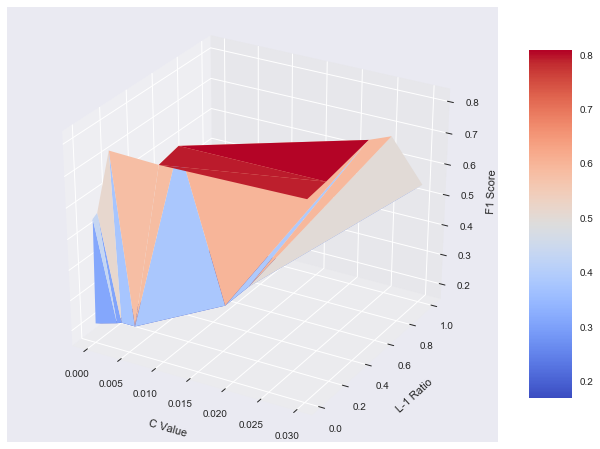

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_trisurf(c,l1, np.array(f1),cmap='coolwarm')
fig.colorbar(surface, shrink=0.8, aspect=8)

ax.set_xlabel('C Value',labelpad=15)
ax.set_ylabel('L-1 Ratio', labelpad=15)
ax.set_zlabel('F1 Score',labelpad=10)

plt.show()

# Q.4

In [31]:
from sklearn.svm import SVC

In [32]:
svc_param = {
    'gamma' : [ 1e-3, 1e-4],
    'C': [1,10,100,1000]
}

clf = SVC()

In [33]:
model = Grid(clf,svc_param)
grid = model.grid
result = grid.cv_results_
mean_f1_macro = result['mean_test_f1_macro']
mean_test_acc = result['mean_test_accuracy']
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [34]:
model.show_prediction_results(X_test,y_test,conf_matrix=True)

Accuracy of model is 0.9666666666666667

F1 score of model is 0.9670588235294119

Confusion Matrix:

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [35]:
f1 = mean_f1_macro.tolist()
c = []
gamma = []
for item in result['params']:
    c.append(item['C'])
    gamma.append(item['gamma'])

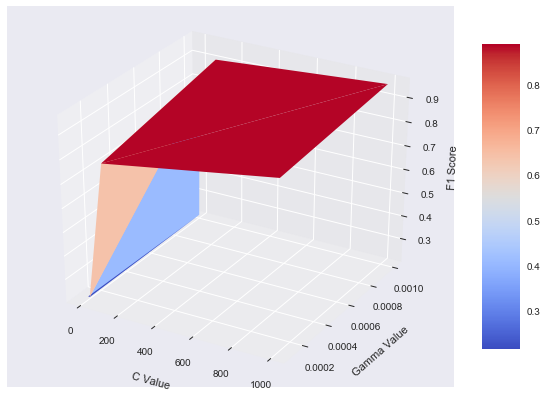

In [36]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_trisurf(c,gamma, np.array(f1),cmap='coolwarm')
fig.colorbar(surface, shrink=0.8, aspect=8)

ax.set_xlabel('C Value',labelpad=15)
ax.set_ylabel('Gamma Value', labelpad=15)
ax.set_zlabel('F1 Score',labelpad=10)

plt.show()

# Q.5

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest_param = {
    'max_depth':[300,500,600],
    'n_estimators': [ 200,500,700]  
}

clf = RandomForestClassifier()

In [39]:
model = Grid(clf,forest_param)
grid = model.grid
result = grid.cv_results_
mean_f1_macro = result['mean_test_f1_macro']
mean_test_acc = result['mean_test_accuracy']
grid.best_params_

{'max_depth': 300, 'n_estimators': 700}

In [40]:
model.show_prediction_results(X_test,y_test,conf_matrix=True)

Accuracy of model is 0.9

F1 score of model is 0.9038901601830664

Confusion Matrix:

[[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.73      1.00      0.84         8
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



In [41]:
f1 = mean_f1_macro.tolist()
max_depth = []
n_estimators = []
for item in result['params']:
    max_depth.append(item['max_depth'])
    n_estimators.append(item['n_estimators'])

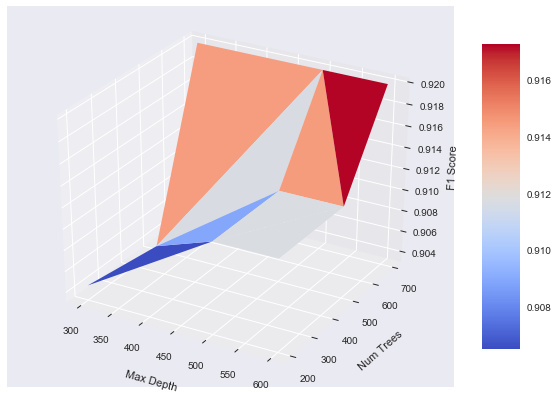

In [42]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_trisurf(max_depth,n_estimators, np.array(f1),cmap='coolwarm')
fig.colorbar(surface, shrink=0.8, aspect=8)

ax.set_xlabel('Max Depth',labelpad=15)
ax.set_ylabel('Num Trees', labelpad=15)
ax.set_zlabel('F1 Score',labelpad=10)

plt.show()

# EXTRA
## Improving Model Performances via Feature Selection

In [43]:
! pip install yellowbrick

In [44]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_selection import RFE,SelectFromModel,SelectKBest,VarianceThreshold,chi2,f_classif,mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

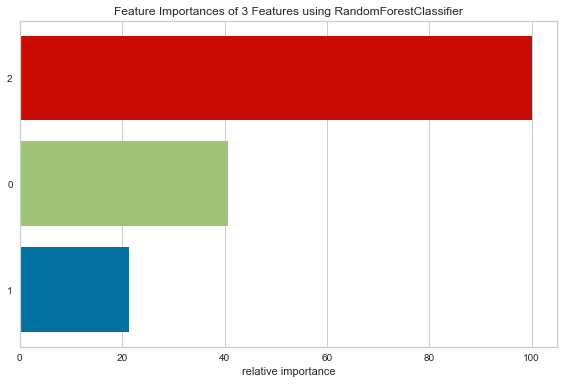

In [107]:
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X_train,y_train)
viz.show()

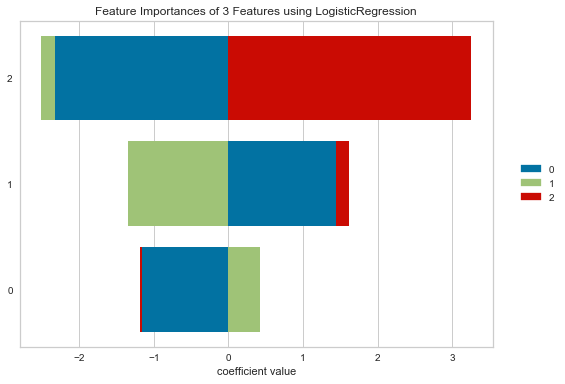

In [108]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(X_train, y_train)
viz.show()

In [109]:
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_train, i) for i in range(X_train.shape[1])]

In [110]:
vif

,VIF Factor
0,6.816093
1,1.705773
2,7.723753


In [1]:
! pip install imblearn


  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [ ]:
class PostProcessing():
    '''
    Class to attain a balanced distribution of the classes using either under or over sampling techniques on training
    examples
    '''
    def __init__(self,method='over_sample', for_NN=False):
        '''
        Constructor to store the under or over sample argument
        args:
            method: method to use for the sampling. over_sampling' by default {'over_sample','under_sample'}
        '''
        self.method = method
        self.for_NN = for_NN
        
    
    def over_sample(self,X_train=None,y_train=None, show_dist=False):
        '''
        Function to perform over sampling of minority classes by using SMOTE
        args:
            X_train: Training numerical data in form of numpy array
            y_train: Training labels which are not perfectly seperated
        out:
            X_train,y_train: over sampled minority data with increase number of training examples
        '''
        
        from imblearn.over_sampling import SMOTE
        X_train, y_train = SMOTE().smt.fit_sample(X_train, y_train)
        return X_train, y_train
    
    
    def under_sample(self,X_train=None,y_train=None,show_dist=False):
         '''
        Function to perform over sampling of minority classes by using SMOTE
        args:
            X_train: Training numerical data in form of numpy array
            y_train: Training labels which are not perfectly seperated
        out:
            X_train,y_train: over sampled minority data with increase number of training examples
        '''
            
        from imblearn.under_sampling import NearMiss
        X_train, y_train = Nearmiss().fit_sample(X_train, y_train)   
        return X_train, y_train
    
    
    def class_weight_NN(self,y_train):
        '''
        used in Neural Networks to provide bias to the under sampled classes. Use output in the class_weight
        args:
            y_train: training data labels
        out: 
            weights of corresponding classes where under sampled classes have a bias given
        '''
        
        from sklearn.utils import class_weight
        return class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
        
    
    
    def balance(self,y_train,X_train=None,for_neural=False):
        '''
        perform balancing of classes using the above methods for users who don't know what to use
        args:
            X_train :  training set in form numpy array
            y_train : labels in form numpy array
        out:
            sampled X_train, y_train
        '''
        if self.for_NN:
            for_neural = self.for_NN
        
        if for_neural:
            return self.class_weight_NN(y_train)
        
        else:
            if self.method == 'over_sample':
                return self.over_sample(X_train,y_train)
            else:
                return self.under_sample(X_train,y_train)
                
    